In [1]:
from Source.UCBLearner1 import *
from Source.Auxiliary import *
from tqdm import trange

In [2]:
env1, model, class_probability = generate_environment()
real_conv_rates = model["real_conversion_rates"]
prices = model["prices"]

T = 30
n_exp = 10
daily_user = 500

In [3]:
optimal_arm = optimization_algorithm(model, False)  # pull the optimal arm
print("Optimal_arm: ", optimal_arm)

optimal_act_rate = mc_simulation(model, real_conv_rates[range(5), optimal_arm], 5, 10000)

optimal_reward = return_reward(model, prices[range(5), optimal_arm],
                               real_conv_rates[range(5), optimal_arm], optimal_act_rate, model['real_alpha_ratio'], model['real_quantity'])
print("Optimal reward: ", optimal_reward)

Optimal_arm:  [1 0 1 0 0]
Optimal reward:  4.221181480579224


In [4]:
learner = UCBLearner1(model)
instant_regret_obs = [[] for _ in range(n_exp)]

In [5]:
for i in trange(n_exp):

    for t in range(T):
        pulled_arm = learner.act()
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, pulled_arm, class_probability)
        env_data = conv_data(data)
        learner.update(pulled_arm, env_data)

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        instant_regret_obs[i].append(optimal_reward - obs_reward)
    learner.reset()

100%|██████████| 10/10 [01:28<00:00,  8.82s/it]


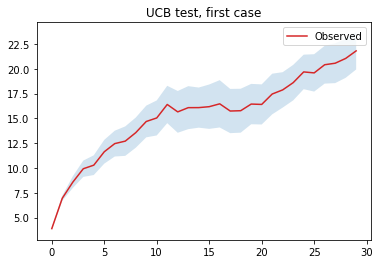

In [6]:
show_results(instant_regret_obs, "UCB test, first case")